#Importing Libraries

In [33]:
import re
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import string
import nltk
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

In [34]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

#Loading Dataset

In [35]:
!pip install kaggle

In [36]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [37]:
! cp kaggle.json ~/.kaggle/

In [38]:
! chmod 600 ~/.kaggle/kaggle.json

In [39]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

genre-classification-dataset-imdb.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!unzip /content/genre-classification-dataset-imdb.zip

Archive:  /content/genre-classification-dataset-imdb.zip
replace Genre Classification Dataset/description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [41]:
train_data = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [42]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [43]:
test_data=pd.read_csv('/content/Genre Classification Dataset/test_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [44]:
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [45]:
test_data_soln=pd.read_csv('/content/Genre Classification Dataset/test_data_solution.txt', sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [46]:
test_data_soln.head()

,Id,Title,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [47]:
test_data_soln.drop(test_data_soln.columns[[0, 2]], axis=1, inplace=True)

In [48]:
test_data_soln.rename(columns = {'Title':'Actual Genre'}, inplace = True)

In [49]:
test_data_soln.head()

,Actual Genre
1,thriller
2,comedy
3,documentary
4,drama
5,drama


#Visualize Data

In [50]:
train_data.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

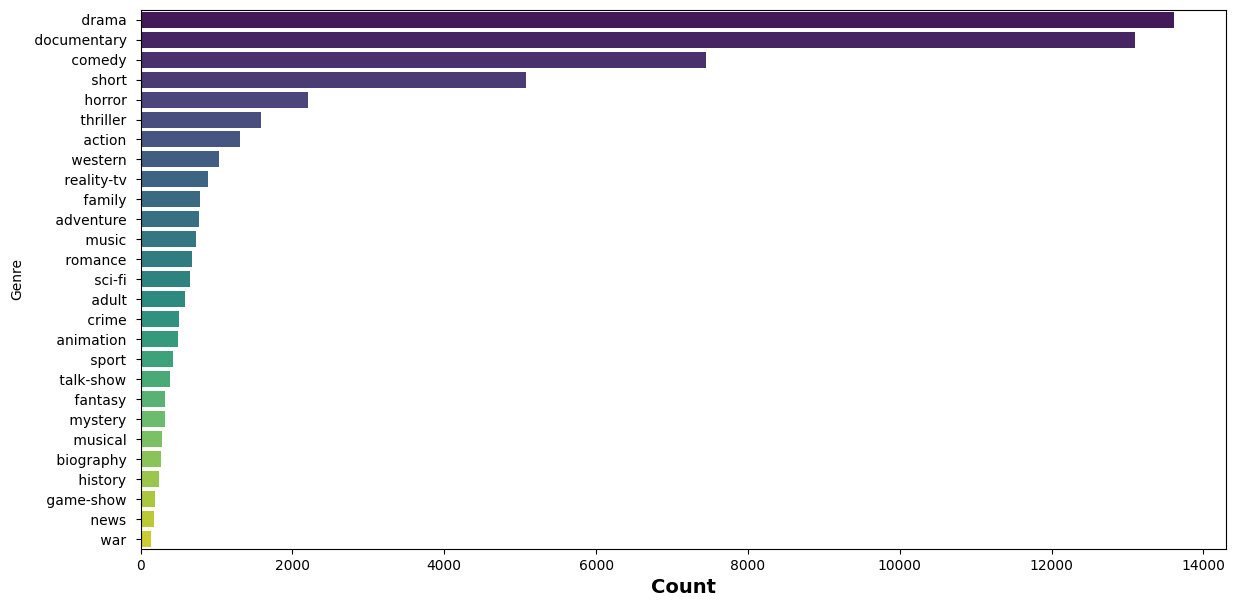

In [51]:
plt.figure(figsize=(14,7))
sns.countplot(data=train_data,y='Genre',order=train_data['Genre'].value_counts().index,palette='viridis')
plt.xlabel('Count',fontsize=14,fontweight='bold')
plt.ylabel

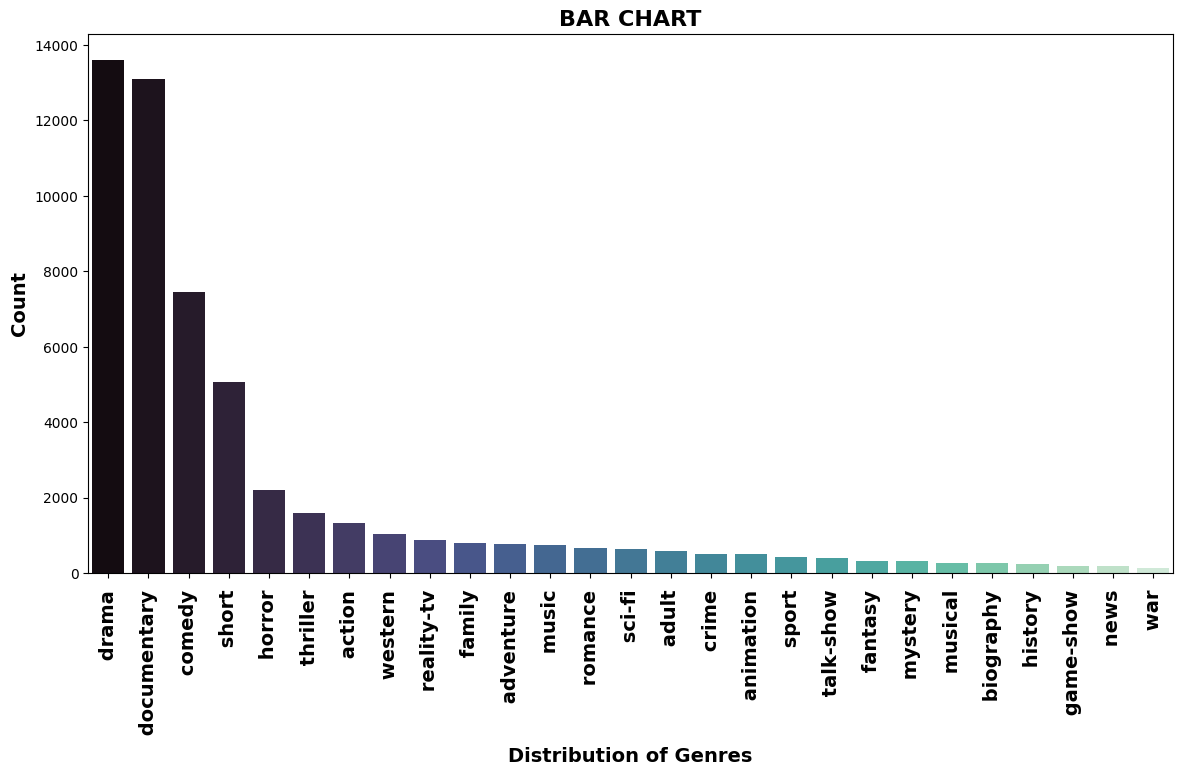

In [52]:
plt.figure(figsize=(14,7))
counts=train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='mako')
plt.xlabel('Distribution of Genres',fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('BAR CHART', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

#Data preprocessing

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [54]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [55]:
stemmer=LancasterStemmer()
stop_words=set(stopwords.words('english'))
def cleanText(text):
  text=text.lower()
  text=re.sub(r'@\S+','',text)
  text=re.sub(r'http\S+','',text)
  text = re.sub(r"[^a-zA-Z+']", ' ', text)
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
  text=''.join([i for i in text if i not in string.punctuation])
  words=nltk.word_tokenize(text)
  stopwords=nltk.corpus.stopwords.words('english')
  text=" ".join([i for i in words if i not in stopwords and len(i)>2])
  text=re.sub("\s[\s]+"," ",text).strip()
  return text
train_data['Text_cleaning']=train_data['Description'].apply(cleanText)
test_data['Text_cleaning']=test_data['Description'].apply(cleanText)

In [56]:
# Dropping the redundant data
train_data.drop_duplicates

<bound method DataFrame.drop_duplicates of                                               Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  \
1       Listening in to a conversation between his do...   
2       A brother and sister with a past incestuous r...   
3       As the bus empties the students for their fie...   
4       To help their unemployed father make ends mee...   
5       The film's title refers not only to the un-re...   
...                                                  ...   
54210   This short-lived NBC live sitcom centered on ...   
54211   The NEXT Generation of EXPLOITATION. The sist...   
54212   Ze bestaan echt, is a stand-up comedy about g...   
54213   Walter and Vivian live in the country and hav...   
54214   On Labor Day Weekend, 1935, the most intense ...   

                                           Text_cleaning  
1      listening conversation doctor parents year old...  
2      brother sister past incestuous relationship cu...  
3      bus empties students field trip museum natural...  
4      help unemployed father make ends meet edith tw...  
5      films title refers recovered bodies ground zer...  
...                                                  ...  
54210  short lived nbc live sitcom centered bonino wo...  
54211  next generation exploitation sisters kapa bay ...  
54212  bestaan echt stand comedy growing facing fears...  
54213  walter vivian live country difficult time keep...  
54214  labor day weekend intense hurricane ever make ...  

[54214 rows x 4 columns]>

In [57]:
train_data.shape

(54214, 4)

In [58]:
warnings.filterwarnings("ignore","use_inf_as_na")

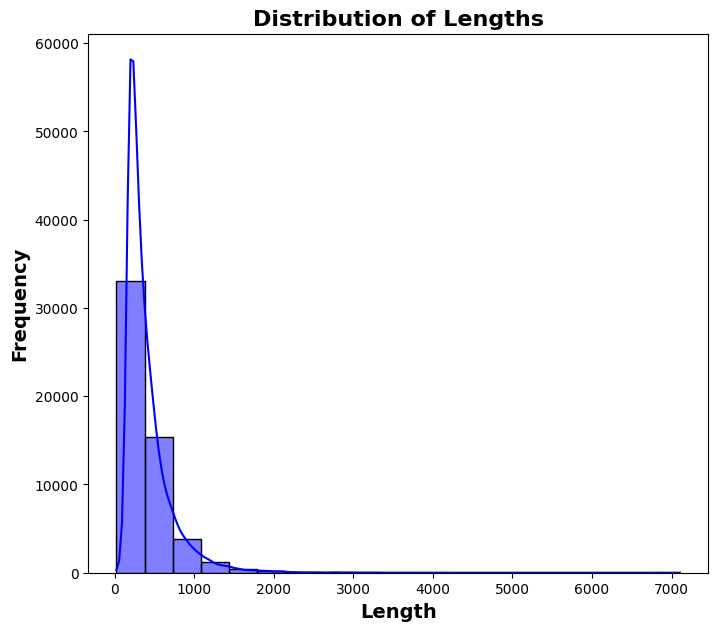

In [59]:
# distribution of text lengths
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
plt.figure(figsize=(8,7))
sns.histplot(data=train_data,x='length_Text_cleaning',bins=20,kde=True,color='blue')
plt.xlabel('Length',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.title('Distribution of Lengths',fontsize=16,fontweight='bold')
plt.show()

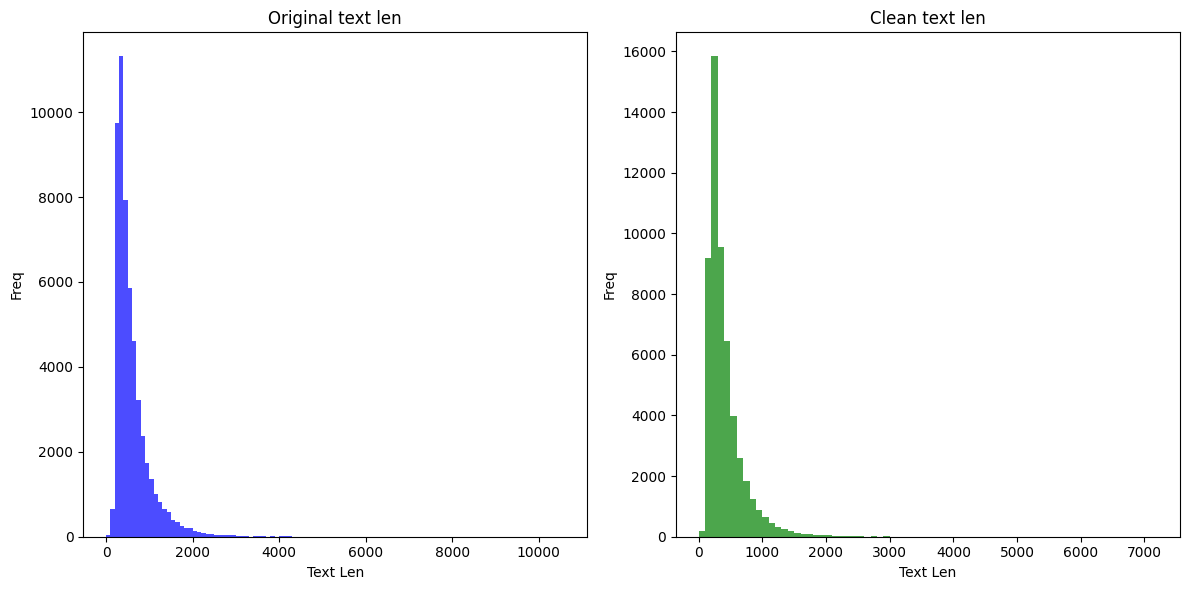

In [60]:
#distribution of text lengths before and after cleaning
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
originalLengths=train_data['Description'].apply(len)
plt.hist(originalLengths,bins=range(0,max(originalLengths)+100,100),color='blue',alpha=0.7)
plt.title('Original text len')
plt.xlabel('Text Len')
plt.ylabel('Freq')

plt.subplot(1,2,2)
cleanLength=train_data['Text_cleaning'].apply(len)
plt.hist(cleanLength,bins=range(0,max(cleanLength)+100,100),color='green',alpha=0.7)
plt.title('Clean text len')
plt.xlabel('Text Len')
plt.ylabel('Freq')

plt.tight_layout()
plt.show()

#Text Vectorization

In [61]:
tfidfVectorizer=TfidfVectorizer()
X_train=tfidfVectorizer.fit_transform(train_data['Text_cleaning'])
X_test=tfidfVectorizer.transform(test_data['Text_cleaning'])

#Split Data And Train Model

In [62]:
X=X_train
y=train_data['Genre']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

#Naive Bayes

In [63]:
warnings.filterwarnings('ignore')
NBclassifier=BernoulliNB()
NBclassifier.fit(X_train,y_train)
yPred=NBclassifier.predict(X_val)
accuracyNB=accuracy_score(y_val,yPred)
print("Validation accuracy:",accuracyNB)
print(classification_report(y_val,yPred))

Validation accuracy: 0.4869501060592087
               precision    recall  f1-score   support

      action        0.25      0.00      0.01       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.54      0.33      0.41      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.90      0.70      2659
       drama        0.41      0.87      0.56      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.79      0.05      0.10       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00

In [64]:
X_test_predictions = NBclassifier.predict(X_test)
test_data['Predicted_Genre_NB'] = X_test_predictions

#Logistic Regression

In [65]:
LogisticClassifier=LogisticRegression(multi_class='multinomial',solver='sag')
LogisticClassifier.fit(X_train,y_train)
yPred=LogisticClassifier.predict(X_val)
accuracyLR=accuracy_score(y_val,yPred)
print("Validation accuracy:",accuracyLR)
print(classification_report(y_val,yPred))

Validation accuracy: 0.5794521811306834
               precision    recall  f1-score   support

      action        0.61      0.21      0.32       263
       adult        0.86      0.17      0.28       112
   adventure        0.45      0.10      0.16       139
   animation        0.67      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        1.00      0.01      0.02       107
 documentary        0.65      0.87      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.50      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.55      0.61       431
       music        0.69      0.38      0.49       144
     musical        0.00      0.00      0.00        50
     mystery        0.00

In [66]:
X_test_predictions = LogisticClassifier.predict(X_test)
test_data['Predicted_Genre_LR'] = X_test_predictions

#Make Consolidated DFs

In [67]:
test_data.to_csv('predicted_genres.csv', index=False)

# Add actual genre column to predicted dataFrame
extracted_col = test_data_soln["Actual Genre"]
test_data.insert(5, "Actual Genre", extracted_col)

In [68]:
test_data.head()

,Title,Genre,Description,Text_cleaning,Predicted_Genre_NB,Actual Genre,Predicted_Genre_LR
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama,NaN,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama,thriller,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary,comedy,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama,documentary,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama,drama,drama


In [69]:
countSameValuesNB=(test_data['Predicted_Genre_NB']==test_data['Actual Genre']).sum()
countSameValuesLR=(test_data['Predicted_Genre_LR']==test_data['Actual Genre']).sum()
print("NB correct predictions:",countSameValuesNB)
print('LR correct predictions:',countSameValuesLR)

NB correct predictions: 12786
LR correct predictions: 10894


#Comparison

In [70]:
# On the basis of accuracy score
sum=accuracyNB+accuracyLR
size1=accuracyNB/sum
size2=accuracyLR/sum

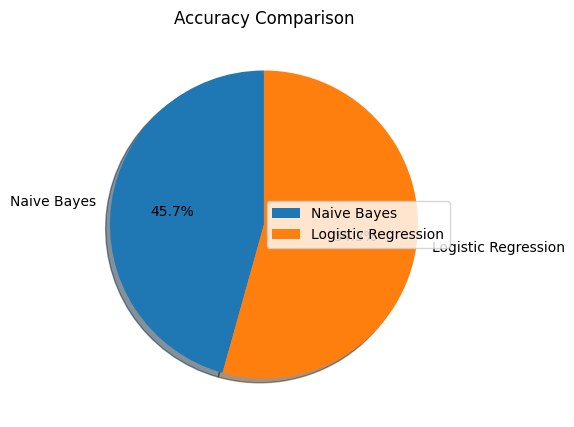

In [71]:
labels = ['Naive Bayes', 'Logistic Regression']
sizes = [size1, size2]

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

In [72]:
# On the basis of solution
sum=countSameValuesNB+countSameValuesLR
portion1=countSameValuesNB/sum
portion2=countSameValuesLR/sum

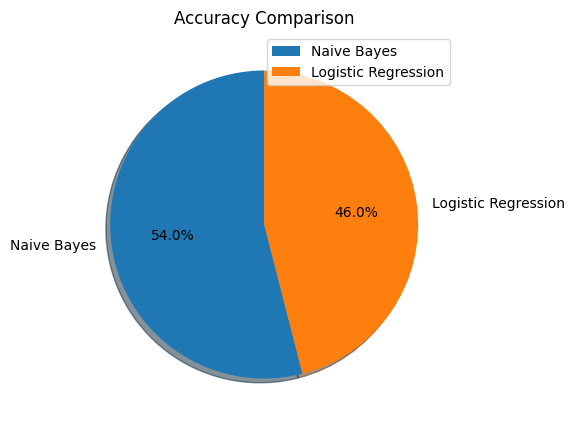

In [73]:
labels = ['Naive Bayes', 'Logistic Regression']
sizes = [portion1, portion2]

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()